# Matplotlib 画图种类

首先导入matplot和numpy：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 一、散点图 Scatter

`plt.scatter(x,y,s=75,c=T,alpha=0.5)`

**参数：**

`x,y` - 散点坐标

`s,c,alpha` - 散点大小，颜色，透明度

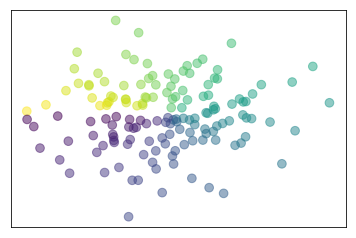

In [13]:
# 产生数据
n = 150   # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # 颜色值
# 绘图
plt.scatter(X,Y,s=75,c=T,alpha=0.5)
plt.xticks(())  # ignore xticks
plt.yticks(())  # ignore yticks
plt.show()

# 二、柱状图 Bar

`plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')`

**参数：**

`X` - 对应每个柱形中间的x坐标

`Y` - 每个柱形高度

`facecolor` - 填充颜色

`edgecolor` - 边框颜色

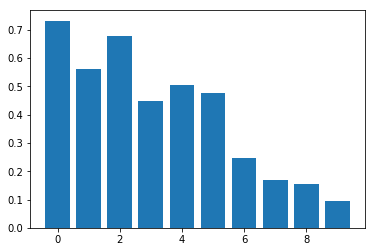

In [16]:
# 产生数据
X = np.arange(10)
Y1 = (1 - X/10.0) * np.random.uniform(0.5,1,10)
Y2 = (1 - X/10.0) * np.random.uniform(0.5,1,10)

plt.bar(X,Y)
plt.show()

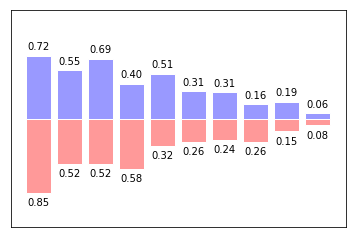

In [24]:
# 自定义颜色，添加标注
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
# 刻度设置
plt.ylim(-1.25,1.25)
plt.xticks(())
plt.yticks(())
# 标注数字
for x, y in zip(X, Y1):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x , y + 0.05, '%.2f' % y, ha='center', va='bottom')

for x, y in zip(X, Y2):
    plt.text(x , -y - 0.05, '%.2f' % y, ha='center', va='top')

plt.show()

# 三、等高线图 Contours

### 1. 颜色填充等高线图

`plt.contourf(X, Y, height, 8, alpha=0.75, cmap=plt.cm.hot)`

**参数：**

`X,Y` - 坐标的网格，meshgrid后得到的

`height` - 高度的网格

`8` - 要划分的层次数量

`alpha` - 透明度

`cmap=plt.cm.hot` - 将高度值对应到暖色组中找颜色，等效于传入`cmap='hot'`

### 2. 边线等高线图

`C = plt.contour(X, Y, height, 8, colors='black')`

**参数：**

`colors` - 等高线的颜色

### 3. 添加高度数字

`plt.clabel(C, inline=True, fontsize=10)`

**参数：**

`C` - 等高线图句柄

`inline` - 是否将数字嵌在线中

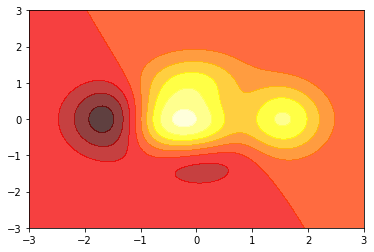

In [9]:
# 高度函数
def height(x,y):
    return  (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)
# 产生数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)  # 将x，y坐标编制成二维栅格
# 颜色填充
plt.contourf(X, Y, height(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
plt.show()

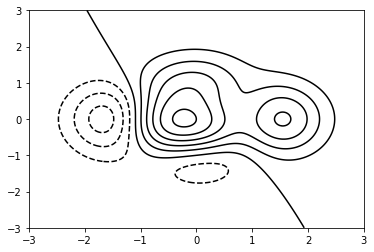

In [6]:
# 只画线
C = plt.contour(X, Y, height(X,Y), 8, colors='black')
plt.show()

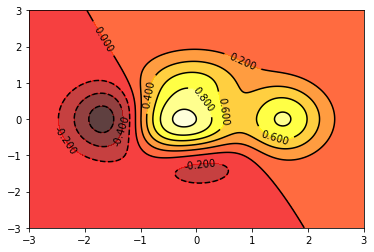

In [8]:
# 综合
plt.contourf(X, Y, height(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, height(X,Y), 8, colors='black')
plt.clabel(C, inline=True, fontsize=10)
plt.show()

# 四、图片 Image

### 1. 显示图片 imshow

[官网介绍](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html?highlight=imshow#matplotlib.pyplot.imshow)

`plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')`

**参数：**

`a` - 一个图像矩阵

`cmap` - 色谱

`interpolation` - 插补方式（可选）

`origin` - 数据的第一行对应图像的上upper，或下lower（可选）

### 2. 色条 colorbar

`plt.colorbar(shrink=.92)`

**作用：**在图像右边添加一对比色条。

** 参数：**

`shrink` - 色条缩短的百分数

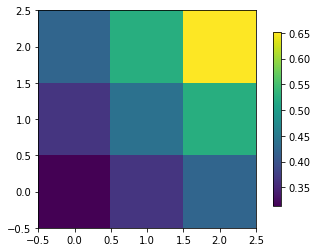

In [17]:
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
plt.imshow(a, interpolation='nearest', cmap='viridis', origin='lower')
plt.colorbar(shrink=0.8)
plt.show()

# 五、3D数据

### 1. 添加模块 Axes3D
首先在进行 3D Plot 时除了导入 `matplotlib`，还要额外添加一个模块，即 `Axes 3D` 3D 坐标轴显示。

`axes = Axes3D(fig)`

**作用：**在图像fig中添加z轴

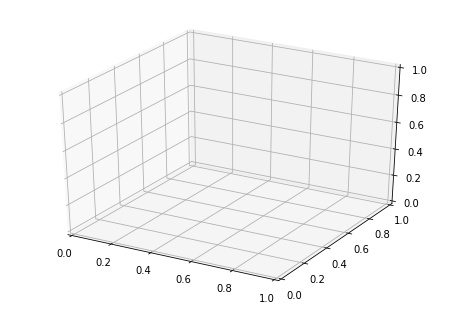

In [23]:
from mpl_toolkits.mplot3d import Axes3D
# 添加z轴
fig = plt.figure()
ax = Axes3D(fig)

### 2.  绘制三维曲面

[官方参考](https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=plot_surface#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface)

`ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')`

**参数：**

`X,Y,Z` - 坐标网格

`rstride, cstride` - row和col方向的采样步幅

### 3. 投影 （使用三维等高线图Contourf）

[官方参考](https://matplotlib.org/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?highlight=contourf#mpl_toolkits.mplot3d.axes3d.Axes3D.contourf)

`ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))`

**参数：**

`zdir` - 投影方向

`offset=-2` - 投影在`z=-2`的平面上

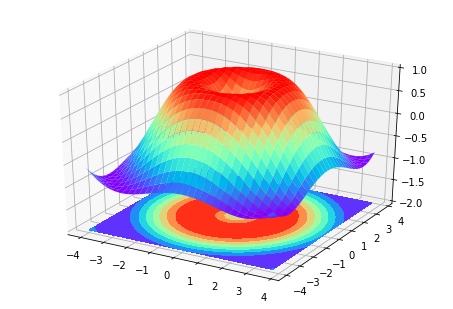

In [39]:
# 添加z轴
fig = plt.figure()
ax = Axes3D(fig)
# 生成数据
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)    # x-y 平面的网格
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
# 绘制三维曲面
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
# 投影
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap='rainbow')
ax.set_zlim(-2,1)
plt.show()